In [1]:
import pandas as pd
import random
from faker import Faker

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
fake = Faker()
random.seed(42)

In [4]:
#Creating a sample dataset using faker in 3 steps:

# Generating user data

user_data = {
    'user_id':[i for i in range(1,11)],
    'name': [fake.name() for _ in range(10)],
    'income': [random.randint(30000,120000) for _ in range(10)]
}

users = pd.DataFrame(user_data)

users

,user_id,name,income
0,1,Jamie Chang,113810
1,2,Becky Terry,44592
2,3,Shelby White,33278
3,4,Eric Logan,66048
4,5,Mr. Ryan Jones,62098
5,6,Angela Rodriguez,59256
6,7,Austin Holmes,48289
7,8,Kevin Daugherty,43434
8,9,Emily Hoover,118696
9,10,Karen Harris,101482


In [5]:
#Generating transaction data

categories = ["groceries", "entertainment", "utilities", "rent", "miscellaneous"]
transaction_data = {
    'transaction_id': [fake.uuid4() for _ in range(100)],
    'user_id': [random.choice(users['user_id'].tolist()) for _ in range(100)],
    'categories': [random.choice(categories)for _ in range(100)],
    'expense': [random.randint(100,9000)for _ in range(100)],
    'date': [fake.date_this_year()for _ in range(100)]
}

transactions = pd.DataFrame(transaction_data)

In [6]:
transactions

,transaction_id,user_id,categories,expense,date
0,67ef1364-6c2c-4ba8-8f9a-34167af88a4c,2,utilities,3999,2024-03-12
1,1704a768-a790-4eab-adb8-4776086fbf89,10,entertainment,4662,2024-04-13
2,9f22e100-028c-49c1-b3db-173a51ba7e1c,7,entertainment,8053,2024-04-20
3,3aba9bac-2802-4b56-a0c7-e9ef2275bce7,1,miscellaneous,3610,2024-06-07
4,1b021f6d-45cf-4343-8bce-0b814de0cfd8,1,rent,8934,2024-05-03
...,...,...,...,...,...
95,c25e0e01-7cf8-4d7e-9238-4d49a6c028a1,5,groceries,5015,2024-02-29
96,cf62eaab-dd64-4fd3-b9e2-e336339013a8,10,groceries,7591,2024-05-20
97,2b0c833c-21d1-40ef-b330-66609b68088a,7,utilities,5280,2024-01-12
98,868fed6d-e253-4898-badb-756549c48a97,10,groceries,1288,2024-02-18


In [7]:
#Generating financial data

financial_data = {
    'user_id':users['user_id'],
    'saving_goals': [random.randint(10000,50000)for _ in range(10)],
    'investment_goals': [random.randint(20000,60000)for _ in range(10)]
}

financials = pd.DataFrame(financial_data)
financials

,user_id,saving_goals,investment_goals
0,1,40034,24508
1,2,46896,36009
2,3,16552,44217
3,4,14801,38676
4,5,45234,30338
5,6,23969,48716
6,7,43153,55600
7,8,27380,39825
8,9,18680,54664
9,10,32872,20512


# Merging datasets into 1

In [8]:
merged_data = pd.merge(users,transactions, on='user_id')
data = pd.merge(merged_data, financials, on='user_id')

In [9]:
data.head()

,user_id,name,income,transaction_id,categories,expense,date,saving_goals,investment_goals
0,1,Jamie Chang,113810,3aba9bac-2802-4b56-a0c7-e9ef2275bce7,miscellaneous,3610,2024-06-07,40034,24508
1,1,Jamie Chang,113810,1b021f6d-45cf-4343-8bce-0b814de0cfd8,rent,8934,2024-05-03,40034,24508
2,1,Jamie Chang,113810,a32de940-d46a-42fb-b0d8-f1b66cca1408,rent,3219,2024-06-08,40034,24508
3,1,Jamie Chang,113810,7bd5687e-3d7d-405e-9c80-63e1e64ce160,miscellaneous,1712,2024-06-27,40034,24508
4,1,Jamie Chang,113810,487dab07-5361-4c19-94df-5b400df4089f,groceries,1335,2024-02-27,40034,24508


In [10]:
data['date'] = pd.to_datetime(data['date'])

In [11]:
#Adding month, quarter and week columns

data['Month'] = data['date'].dt.month
data['Quarter'] = data['date'].dt.quarter
data['Week'] = data['date'].dt.week


In [12]:
data.head()

,user_id,name,income,transaction_id,categories,expense,date,saving_goals,investment_goals,Month,Quarter,Week
0,1,Jamie Chang,113810,3aba9bac-2802-4b56-a0c7-e9ef2275bce7,miscellaneous,3610,2024-06-07,40034,24508,6,2,23
1,1,Jamie Chang,113810,1b021f6d-45cf-4343-8bce-0b814de0cfd8,rent,8934,2024-05-03,40034,24508,5,2,18
2,1,Jamie Chang,113810,a32de940-d46a-42fb-b0d8-f1b66cca1408,rent,3219,2024-06-08,40034,24508,6,2,23
3,1,Jamie Chang,113810,7bd5687e-3d7d-405e-9c80-63e1e64ce160,miscellaneous,1712,2024-06-27,40034,24508,6,2,26
4,1,Jamie Chang,113810,487dab07-5361-4c19-94df-5b400df4089f,groceries,1335,2024-02-27,40034,24508,2,1,9


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

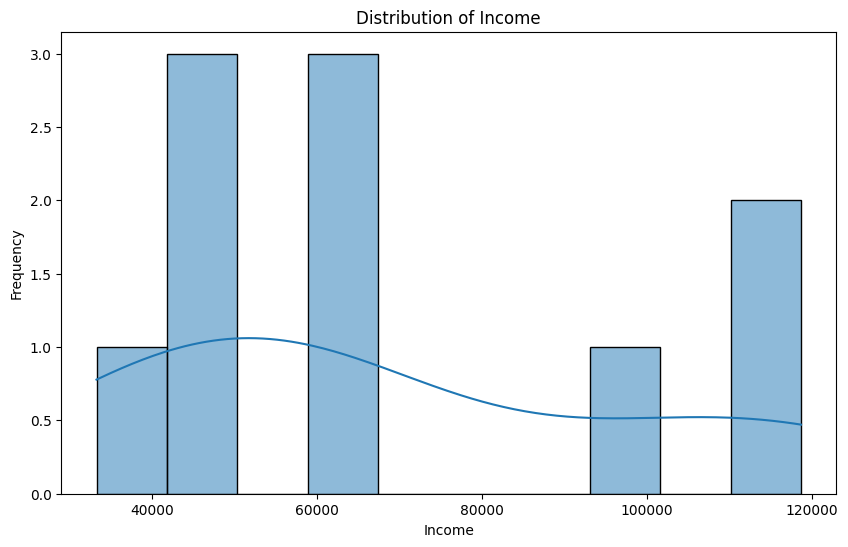

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(users['income'], kde = True, bins=10)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Distribution of Income')
plt.show()

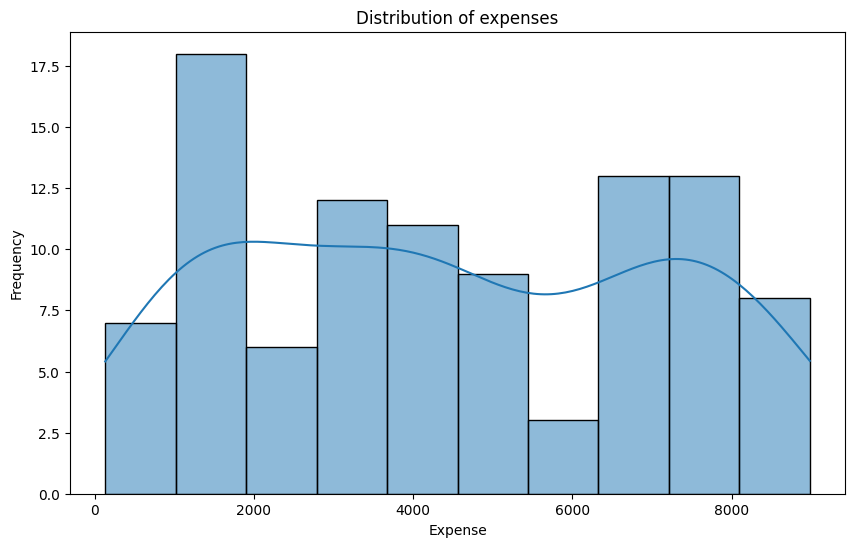

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(transactions['expense'], kde = True, bins=10)
plt.xlabel('Expense')
plt.ylabel('Frequency')
plt.title('Distribution of expenses')
plt.show()

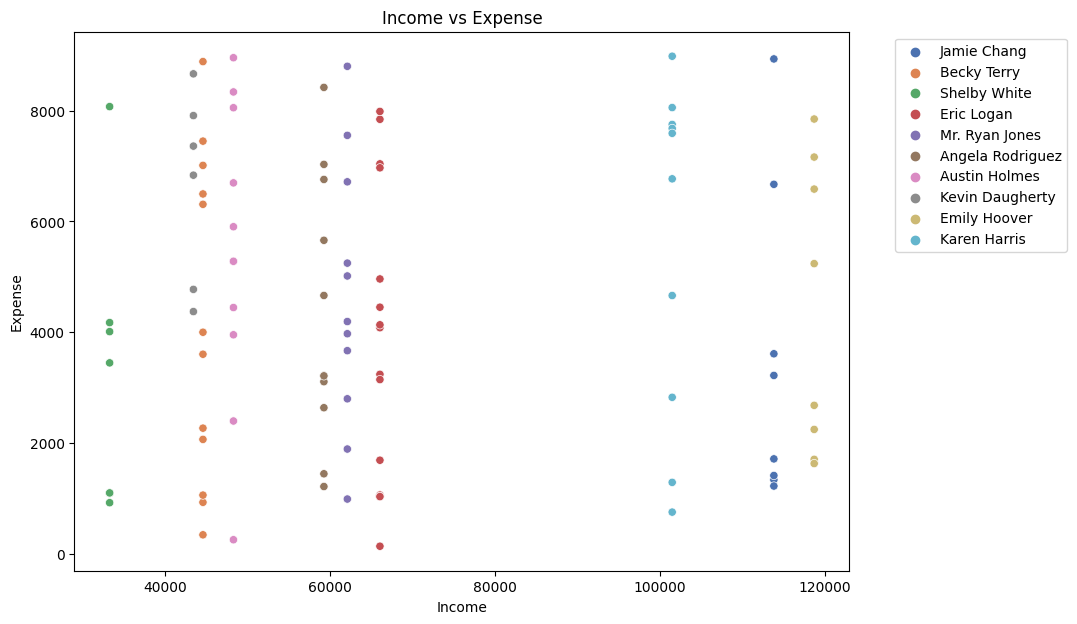

In [16]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='income',y='expense', hue='name', data=data, palette='deep')
plt.title('Income vs Expense')
plt.xlabel('Income')
plt.ylabel('Expense')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()

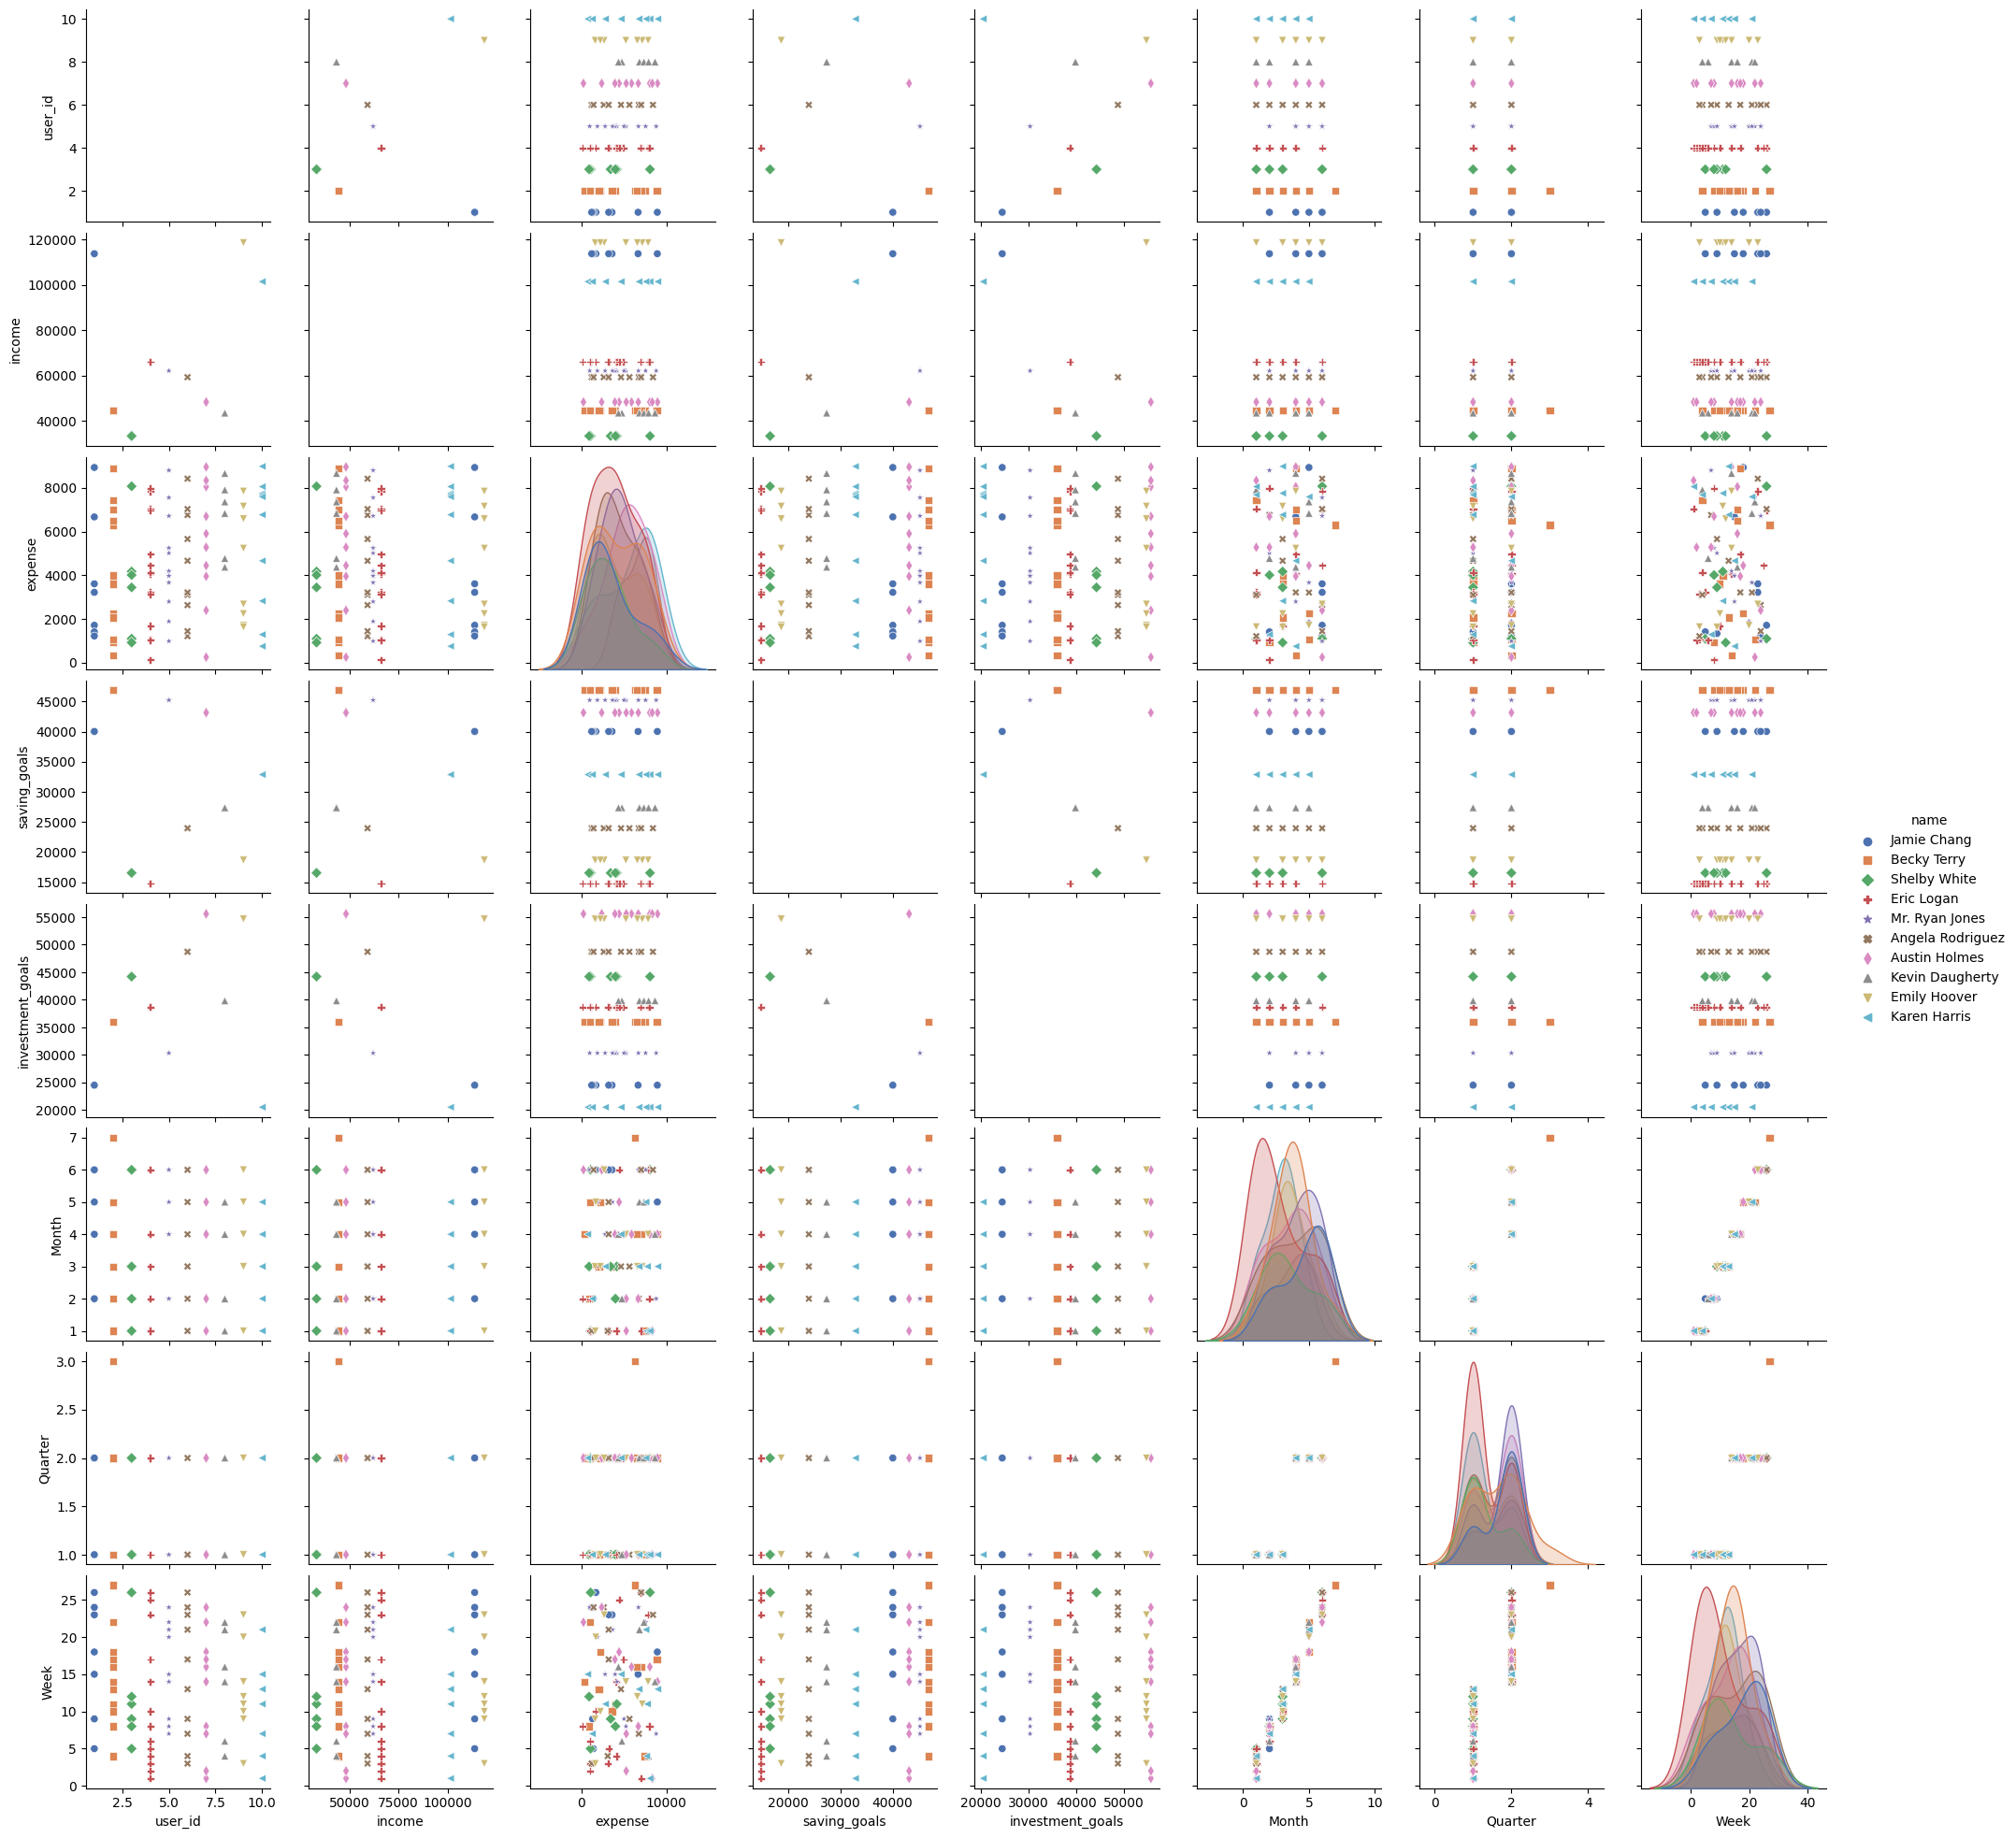

In [17]:
sns.pairplot(data, hue='name', palette='deep', markers=["o", "s", "D", "P", "*", "X", "d", "^", "v", "<"])
plt.show()


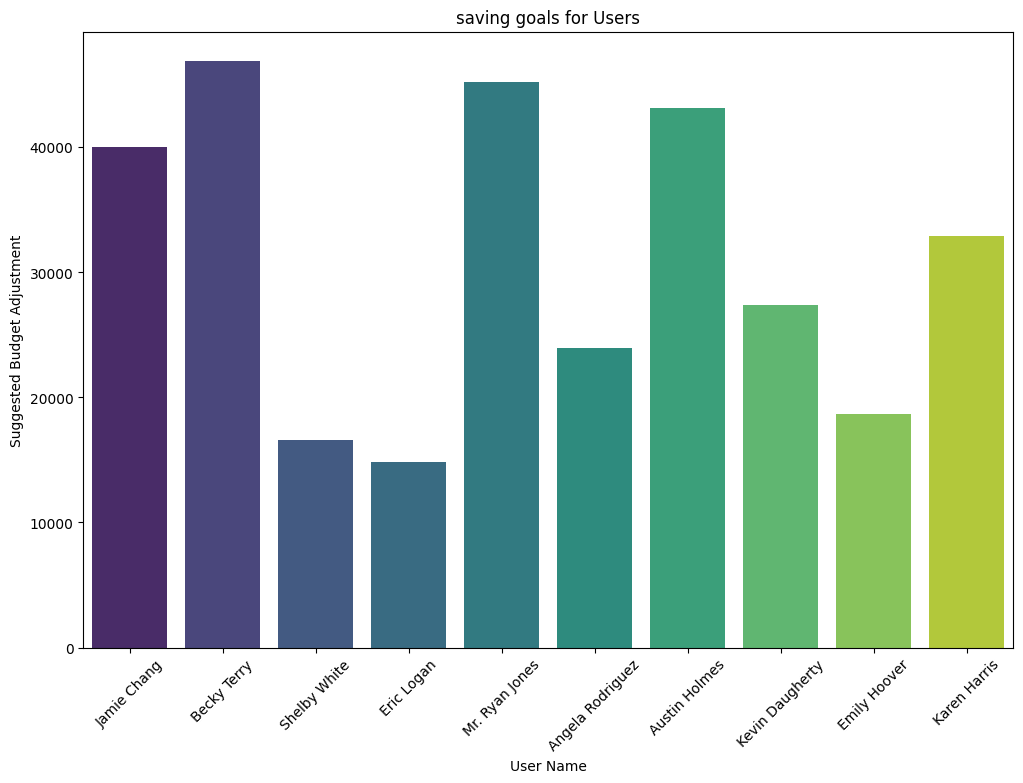

In [18]:
plt.figure(figsize=(12, 8))
sns.barplot(x='name', y='saving_goals', data=data, palette='viridis')
plt.title('saving goals for Users')
plt.xlabel('User Name')
plt.ylabel('Suggested Budget Adjustment')
plt.xticks(rotation=45)
plt.show()


In [19]:
data.head()

,user_id,name,income,transaction_id,categories,expense,date,saving_goals,investment_goals,Month,Quarter,Week
0,1,Jamie Chang,113810,3aba9bac-2802-4b56-a0c7-e9ef2275bce7,miscellaneous,3610,2024-06-07,40034,24508,6,2,23
1,1,Jamie Chang,113810,1b021f6d-45cf-4343-8bce-0b814de0cfd8,rent,8934,2024-05-03,40034,24508,5,2,18
2,1,Jamie Chang,113810,a32de940-d46a-42fb-b0d8-f1b66cca1408,rent,3219,2024-06-08,40034,24508,6,2,23
3,1,Jamie Chang,113810,7bd5687e-3d7d-405e-9c80-63e1e64ce160,miscellaneous,1712,2024-06-27,40034,24508,6,2,26
4,1,Jamie Chang,113810,487dab07-5361-4c19-94df-5b400df4089f,groceries,1335,2024-02-27,40034,24508,2,1,9


# Personalized Budget Suggestions

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
df = data[['income','expense','saving_goals','investment_goals']]
sc = StandardScaler()
df_scaled = sc.fit_transform(df)

In [23]:
df_scaled = pd.DataFrame(df_scaled,columns=['income','expense','saving_goals','investment_goals'])

In [24]:
df_scaled

,income,expense,saving_goals,investment_goals
0,1.641076,-0.340039,0.724038,-1.327966
1,1.641076,1.674033,0.724038,-1.327966
2,1.641076,-0.487955,0.724038,-1.327966
3,1.641076,-1.058054,0.724038,-1.327966
4,1.641076,-1.200673,0.724038,-1.327966
...,...,...,...,...
95,1.191693,1.341885,0.138404,-1.685485
96,1.191693,1.692570,0.138404,-1.685485
97,1.191693,-1.421601,0.138404,-1.685485
98,1.191693,1.165975,0.138404,-1.685485


In [25]:
from sklearn.cluster import KMeans

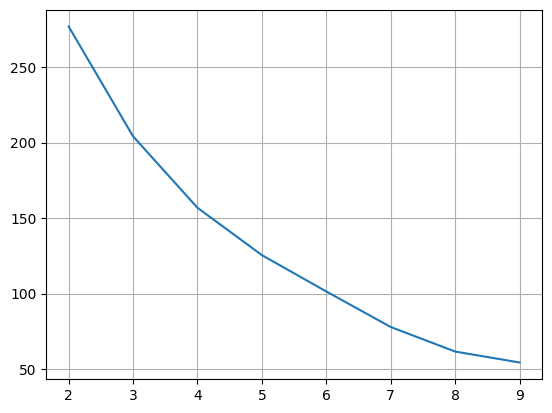

In [26]:
wcss = []
clusters = list(range(2,10))
for i in clusters:
    model = KMeans(n_clusters=i)
    model.fit(df_scaled)
    wcss.append(model.inertia_)
    
plt.grid(True)
plt.plot(clusters,wcss);

In [27]:
model = KMeans(n_clusters=3)
model.fit(df_scaled)

KMeans(n_clusters=3)

In [28]:
data['budget_clusters'] = model.labels_

In [29]:
budget_suggestions = {
    0: 'Low budget - focus on essential expenses and save more.',
    1: 'Moderate budget - maintain current spending and saving balance.',
    2: 'High budget - consider increasing investments and luxury spending.'
}

data['budget_suggestions'] = data['budget_clusters'].map(budget_suggestions)

In [31]:
data.head(10)

,user_id,name,income,transaction_id,categories,expense,date,saving_goals,investment_goals,Month,Quarter,Week,budget_clusters,budget_suggestions
0,1,Jamie Chang,113810,3aba9bac-2802-4b56-a0c7-e9ef2275bce7,miscellaneous,3610,2024-06-07,40034,24508,6,2,23,2,High budget - consider increasing investments ...
1,1,Jamie Chang,113810,1b021f6d-45cf-4343-8bce-0b814de0cfd8,rent,8934,2024-05-03,40034,24508,5,2,18,2,High budget - consider increasing investments ...
2,1,Jamie Chang,113810,a32de940-d46a-42fb-b0d8-f1b66cca1408,rent,3219,2024-06-08,40034,24508,6,2,23,2,High budget - consider increasing investments ...
3,1,Jamie Chang,113810,7bd5687e-3d7d-405e-9c80-63e1e64ce160,miscellaneous,1712,2024-06-27,40034,24508,6,2,26,2,High budget - consider increasing investments ...
4,1,Jamie Chang,113810,487dab07-5361-4c19-94df-5b400df4089f,groceries,1335,2024-02-27,40034,24508,2,1,9,2,High budget - consider increasing investments ...
5,1,Jamie Chang,113810,cac7ac20-60e2-472c-a969-90b04c88a8e7,rent,6670,2024-04-12,40034,24508,4,2,15,2,High budget - consider increasing investments ...
6,1,Jamie Chang,113810,be9c02ce-66e6-4418-bccf-78dec01f89ba,rent,1412,2024-02-04,40034,24508,2,1,5,2,High budget - consider increasing investments ...
7,1,Jamie Chang,113810,365da4c2-297e-414b-b089-4e692241ba97,rent,1222,2024-06-11,40034,24508,6,2,24,2,High budget - consider increasing investments ...
8,2,Becky Terry,44592,67ef1364-6c2c-4ba8-8f9a-34167af88a4c,utilities,3999,2024-03-12,46896,36009,3,1,11,0,Low budget - focus on essential expenses and s...
9,2,Becky Terry,44592,49347791-3269-48ec-9b04-9ef84b50c6ff,groceries,2267,2024-05-05,46896,36009,5,2,18,0,Low budget - focus on essential expenses and s...


# Investment Recommendation

In [32]:
#For disposable income
data['disposable_income'] = data['income'] - data['expense']

# For calculating the savings proportion
data['savings_proportion'] = data['saving_goals'] / data['income']


In [33]:
data.head()

,user_id,name,income,transaction_id,categories,expense,date,saving_goals,investment_goals,Month,Quarter,Week,budget_clusters,budget_suggestions,disposable_income,savings_proportion
0,1,Jamie Chang,113810,3aba9bac-2802-4b56-a0c7-e9ef2275bce7,miscellaneous,3610,2024-06-07,40034,24508,6,2,23,2,High budget - consider increasing investments ...,110200,0.351762
1,1,Jamie Chang,113810,1b021f6d-45cf-4343-8bce-0b814de0cfd8,rent,8934,2024-05-03,40034,24508,5,2,18,2,High budget - consider increasing investments ...,104876,0.351762
2,1,Jamie Chang,113810,a32de940-d46a-42fb-b0d8-f1b66cca1408,rent,3219,2024-06-08,40034,24508,6,2,23,2,High budget - consider increasing investments ...,110591,0.351762
3,1,Jamie Chang,113810,7bd5687e-3d7d-405e-9c80-63e1e64ce160,miscellaneous,1712,2024-06-27,40034,24508,6,2,26,2,High budget - consider increasing investments ...,112098,0.351762
4,1,Jamie Chang,113810,487dab07-5361-4c19-94df-5b400df4089f,groceries,1335,2024-02-27,40034,24508,2,1,9,2,High budget - consider increasing investments ...,112475,0.351762


In [34]:
def recommend_investment(row):
    if row['savings_proportion'] > 0.2:
        return 'Aggressive investments (stocks, mutual funds)'
    elif 0.1 < row['savings_proportion'] <= 0.2:
        return 'Moderate investments (bonds, balanced funds)'
    else:
        return 'Conservative investments (savings account, fixed deposits)'

data['investment_recommendation'] = data.apply(recommend_investment, axis=1)


In [35]:
data.head()

,user_id,name,income,transaction_id,categories,expense,date,saving_goals,investment_goals,Month,Quarter,Week,budget_clusters,budget_suggestions,disposable_income,savings_proportion,investment_recommendation
0,1,Jamie Chang,113810,3aba9bac-2802-4b56-a0c7-e9ef2275bce7,miscellaneous,3610,2024-06-07,40034,24508,6,2,23,2,High budget - consider increasing investments ...,110200,0.351762,"Aggressive investments (stocks, mutual funds)"
1,1,Jamie Chang,113810,1b021f6d-45cf-4343-8bce-0b814de0cfd8,rent,8934,2024-05-03,40034,24508,5,2,18,2,High budget - consider increasing investments ...,104876,0.351762,"Aggressive investments (stocks, mutual funds)"
2,1,Jamie Chang,113810,a32de940-d46a-42fb-b0d8-f1b66cca1408,rent,3219,2024-06-08,40034,24508,6,2,23,2,High budget - consider increasing investments ...,110591,0.351762,"Aggressive investments (stocks, mutual funds)"
3,1,Jamie Chang,113810,7bd5687e-3d7d-405e-9c80-63e1e64ce160,miscellaneous,1712,2024-06-27,40034,24508,6,2,26,2,High budget - consider increasing investments ...,112098,0.351762,"Aggressive investments (stocks, mutual funds)"
4,1,Jamie Chang,113810,487dab07-5361-4c19-94df-5b400df4089f,groceries,1335,2024-02-27,40034,24508,2,1,9,2,High budget - consider increasing investments ...,112475,0.351762,"Aggressive investments (stocks, mutual funds)"


# Expense Prediction

In [36]:
#For prediction, we will use time series

data.set_index('date',inplace=True)

In [39]:
monthly_expenses = data['expense'].resample('M').sum()

In [40]:
monthly_expenses

date
2024-01-31     71422
2024-02-29     60698
2024-03-31     74160
2024-04-30    111027
2024-05-31     48961
2024-06-30     78309
2024-07-31      6309
Freq: M, Name: expense, dtype: int64

In [50]:
from statsmodels.tsa.arima.model import ARIMA

In [52]:

# Fit ARIMA model
model = ARIMA(monthly_expenses, order=(5,1,0))  # (p,d,q) order
model_fit = model.fit()

# Predict future expenses
forecast = model_fit.forecast(steps=12)  # Predicting for next 12 months


In [53]:
forecast

2024-08-31    19650.706560
2024-09-30     9495.240340
2024-10-31     1051.221987
2024-11-30    31929.043474
2024-12-31    13379.125387
2025-01-31    38041.821700
2025-02-28    28229.378166
2025-03-31    27984.711803
2025-04-30    32987.787676
2025-05-31    19668.184689
2025-06-30    29983.599026
2025-07-31    21011.764882
Freq: M, Name: predicted_mean, dtype: float64